# Training a NN to enhance VLL Doublet

In [1]:
import os, sys
import numpy as np
import uproot
import pandas as pd

## Preparing the dataframes

In [2]:
indir = '../../input_trees/'
jobname = 'tree_Apr12_2muSS_ST150'

files = os.listdir(indir+jobname)

def read_file_into_df(filename, truth):
    
    sample = filename.split("_")[1]
    subsample = "_".join(filename.split("_")[2:])
    
    #Exceptions
    if 'QCD' in filename or 'VLL' in filename:
        sample = filename.split("_")[1]+"_"+filename.split("_")[2]
        subsample = filename.split("_")[3].split(".")[0]
        
    if subsample.endswith(".root"): subsample = subsample[:-5]

    filepath = indir+jobname+'/'+filename
    tfile = uproot.open(filepath)
    ttree = tfile['myEvents']
    branches = ttree.keys()
    awkarray = ttree.arrays(branches)
    df = pd.DataFrame(awkarray.to_list())
    df['truth'] = truth
    df['sample'] = sample
    df['subsample'] = subsample

    print(f'dataframe for {sample} {subsample} loaded.')
    return df

print('Functions loaded.')

Functions loaded.


### Preparing the background dataframe:

In [3]:
%%time
#samples = ['DYJetsToLL', 'HTbinnedWJets', 'QCD_MuEnriched', 'QCD_EMEnriched', 'SingleTop', 'TTBar', 'TTZ', 'TTW', 'WW', 'WZ', 'ZZ',
          #'VLLD_mu', 'VLLS_mu', 'VLLD_ele', 'VLLS_ele', 'SingleMuon', 'EGamma']
samples = ['TTBar', 'SingleTop', 'HTbinnedWJets']

bkgdf = pd.DataFrame()

for s in samples:
    for f in files:
        if s in f:
            df = read_file_into_df(f, 0)
            bkgdf = pd.concat([bkgdf, df], ignore_index=True)

print('\033[1;32mDone reading backgrounds.\033[0m\n')

dataframe for TTBar TTTo2L2Nu loaded.
dataframe for TTBar TTToSemiLeptonic loaded.
dataframe for SingleTop s-channel_LeptonDecays loaded.
dataframe for SingleTop t-channel_AntiTop_InclusiveDecays loaded.
dataframe for SingleTop t-channel_Top_InclusiveDecays loaded.
dataframe for SingleTop tW_AntiTop_InclusiceDecays loaded.
dataframe for SingleTop tW_Top_InclusiveDecays loaded.
dataframe for HTbinnedWJets 100to200 loaded.
dataframe for HTbinnedWJets 1200to2500 loaded.
dataframe for HTbinnedWJets 200to400 loaded.
dataframe for HTbinnedWJets 2500toInf loaded.
dataframe for HTbinnedWJets 400to600 loaded.
dataframe for HTbinnedWJets 600to800 loaded.
dataframe for HTbinnedWJets 70to100 loaded.
dataframe for HTbinnedWJets 800to1200 loaded.
Done reading backgrounds.

CPU times: user 9.31 s, sys: 353 ms, total: 9.66 s
Wall time: 11.4 s


In [4]:
bkgdf

,nlep,njet,nbjet,lep0_pt,lep0_eta,lep0_phi,lep0_iso,lep0_mt,lep1_pt,lep1_eta,...,dphi_metlep1,dphi_metdilep,dphi_metlep_max,dphi_metlep_min,metpt,metphi,wt,truth,sample,subsample
0,2,2,1,80.109367,1.036133,-0.002953,0.000000,176.348831,30.208668,-0.938965,...,1.411603,2.519644,2.248558,1.411603,75.192383,2.245605,1.251336,0,TTBar,TTTo2L2Nu
1,2,3,1,57.089535,0.922119,1.279053,0.023249,173.489868,41.992332,1.517334,...,2.891235,2.001868,2.891235,1.393799,219.719757,2.672852,1.201705,0,TTBar,TTTo2L2Nu
2,2,2,1,276.160492,0.046898,1.720215,0.002935,190.676620,16.690493,-1.622314,...,0.008179,2.356832,2.399902,0.008179,37.848106,-0.679688,1.117647,0,TTBar,TTTo2L2Nu
3,2,3,1,53.844231,0.177887,0.562744,0.000000,191.052383,30.782763,0.727051,...,1.633179,2.621617,3.119385,1.633179,166.848785,-2.556641,1.216578,0,TTBar,TTTo2L2Nu
4,2,2,1,47.976402,0.530762,3.135254,0.000000,11.959599,10.665903,0.319275,...,1.486572,0.123645,1.486572,0.347656,21.776321,2.787598,1.209291,0,TTBar,TTTo2L2Nu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423697,2,3,0,57.229645,0.426147,-2.705566,0.037953,118.837708,12.290377,1.854736,...,0.197754,1.746420,1.947736,0.197754,82.575432,1.629883,0.722455,0,HTbinnedWJets,800to1200
423698,2,3,1,80.350746,-1.300293,0.667358,0.000000,116.813660,11.755619,0.505859,...,0.516418,0.677911,0.814392,0.516418,137.306183,-0.147034,1.218211,0,HTbinnedWJets,800to1200
423699,2,2,2,53.926193,-1.184814,-2.854492,0.073664,75.678703,29.160244,-1.156982,...,3.111799,1.542268,3.111799,0.970948,68.201477,-1.883545,1.160040,0,HTbinnedWJets,800to1200
423700,2,3,0,478.693970,-0.886353,0.050491,0.055372,651.707458,17.721334,0.362671,...,0.752442,2.860478,2.892288,0.752442,158.747330,-2.841797,0.813542,0,HTbinnedWJets,800to1200


In [5]:
# Calculate fractions of each sample in the original DataFrame
n_tt = bkgdf[bkgdf['sample'] == 'TTBar'].shape[0]
n_st = bkgdf[bkgdf['sample'] == 'SingleTop'].shape[0]
n_wj = bkgdf[bkgdf['sample'] == 'HTbinnedWJets'].shape[0]
n_all = n_tt + n_st + n_wj

frac_tt = n_tt / n_all
frac_st = n_st / n_all
frac_wj = n_wj / n_all

# Define the desired fractions for the final numbers
frac_tt_new = 17.6 / (17.6 + 2 + 1.6)
frac_st_new = 2 / (17.6 + 2 + 1.6)
frac_wj_new = 1.6 / (17.6 + 2 + 1.6)

n_tt_new = n_tt*(frac_tt_new/frac_tt)
n_st_new = n_st*(frac_st_new/frac_st)
n_wj_new = n_wj*(frac_wj_new/frac_wj)

# Calculate scaling factors to ensure final numbers are within original numbers
scale_factor_tt = min(1, frac_tt_new / frac_tt)
scale_factor_st = min(1, frac_st_new / frac_st)
scale_factor_wj = min(1, frac_wj_new / frac_wj)

# Scale down the new numbers if they exceed the original numbers
n_tt_new_scaled = min(n_tt, scale_factor_tt * n_tt_new)
n_st_new_scaled = min(n_st, scale_factor_st * n_st_new)
n_wj_new_scaled = min(n_wj, scale_factor_wj * n_wj_new)

# Calculate the total for scaling the new numbers
total_new = n_tt_new_scaled + n_st_new_scaled + n_wj_new_scaled

# Calculate the final numbers to ensure the desired ratio
final_n_tt = int((frac_tt / (frac_tt + frac_st + frac_wj)) * total_new)
final_n_st = int((frac_st / (frac_tt + frac_st + frac_wj)) * total_new)
final_n_wj = int((frac_wj / (frac_tt + frac_st + frac_wj)) * total_new)

print('Original numbers vs filtered numbers:')
print(n_tt, final_n_tt)
print(n_st, final_n_st)
print(n_wj, final_n_wj)

###################################################
# Cross-checkning whether the ratio is maintained:
# Calculate the total of all final number
total_final = final_n_tt + final_n_st + final_n_wj
ratio_final_tt = final_n_tt / total_final
ratio_final_st = final_n_st / total_final
ratio_final_wj = final_n_wj / total_final

print("\nRatio of final numbers:")
print(f"TTBar: {ratio_final_tt:.2f}")
print(f"SingleTop: {ratio_final_st:.2f}")
print(f"HTbinnedWJets: {ratio_final_wj:.2f}")

print("\nOriginal (forced) ratio:")
print(f"TTBar: {frac_tt:.2f}")
print(f"SingleTop: {frac_st:.2f}")
print(f"HTbinnedWJets: {frac_wj:.2f}")

##################################################
# Maintaining the forced ratio in the daraframe:
bkgdf_filtered = pd.concat([
    bkgdf[bkgdf['sample'] == 'TTBar'].sample(final_n_tt, replace=True),
    bkgdf[bkgdf['sample'] == 'SingleTop'].sample(final_n_st, replace=True),
    bkgdf[bkgdf['sample'] == 'HTbinnedWJets'].sample(final_n_wj, replace=True)
])

# Reset the index of the filtered DataFrame
bkgdf_filtered.reset_index(drop=True, inplace=True)
bkgdf_filtered = bkgdf_filtered.sample(frac=1)
bkgdf_filtered.reset_index(drop=True, inplace=True)

Original numbers vs filtered numbers:
384658 327467
36306 30908
2738 2330

Ratio of final numbers:
TTBar: 0.91
SingleTop: 0.09
HTbinnedWJets: 0.01

Original (forced) ratio:
TTBar: 0.91
SingleTop: 0.09
HTbinnedWJets: 0.01


In [6]:
bkgdf_filtered

,nlep,njet,nbjet,lep0_pt,lep0_eta,lep0_phi,lep0_iso,lep0_mt,lep1_pt,lep1_eta,...,dphi_metlep1,dphi_metdilep,dphi_metlep_max,dphi_metlep_min,metpt,metphi,wt,truth,sample,subsample
0,2,3,2,93.642059,0.887817,-2.711914,0.000000,47.327831,16.362125,-0.685547,...,2.359601,0.945671,2.359601,0.772217,29.680761,-1.939697,1.206740,0,TTBar,TTToSemiLeptonic
1,2,3,1,45.165665,1.007080,1.197754,0.087182,84.874413,11.474454,0.104065,...,1.975568,1.963594,1.975568,1.780762,42.536297,2.978516,1.090525,0,TTBar,TTToSemiLeptonic
2,2,1,1,75.477234,-0.028198,-1.922363,0.049844,176.518570,23.913996,-0.905396,...,3.132795,2.573181,3.132795,2.399414,118.785248,0.477051,1.310995,0,TTBar,TTToSemiLeptonic
3,2,2,0,87.777161,-0.125824,-2.881836,0.000000,18.280499,16.471617,-0.496399,...,1.279279,0.409520,1.279279,0.265625,53.849625,-2.616211,0.867597,0,TTBar,TTToSemiLeptonic
4,2,2,1,60.016861,0.403625,0.337097,0.017797,78.977852,29.492262,1.099854,...,2.463989,1.440431,2.463989,1.007385,103.022873,-0.670288,1.279235,0,TTBar,TTToSemiLeptonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360700,2,3,1,33.481426,-0.736328,-1.703369,0.000000,88.562828,10.656130,0.537964,...,2.209701,1.874803,2.209701,1.770004,76.178604,0.066635,1.125612,0,TTBar,TTToSemiLeptonic
360701,2,2,0,36.193275,-0.437927,-1.865967,0.070572,10.320762,10.992929,-0.157928,...,2.339599,0.048157,2.339599,0.257568,40.647449,-1.608398,0.820504,0,TTBar,TTToSemiLeptonic
360702,2,4,1,84.175362,-0.032692,-1.960693,0.000000,139.163910,10.686713,0.350159,...,0.668213,2.463303,2.464582,0.668213,64.613068,1.857910,1.005655,0,TTBar,TTToSemiLeptonic
360703,2,4,0,40.083920,-1.282227,-0.618042,0.087361,96.314865,11.943432,-1.335693,...,1.164533,1.279769,1.472290,1.164533,66.116936,-2.090332,0.701971,0,TTBar,TTToSemiLeptonic


### Preparing the signal dataframe:

In [7]:
%%time

samples = ['VLLD_mu', 'VLLS_mu']

sigdf = pd.DataFrame()

for s in samples:
    for f in files:
        if s in f:
            df = read_file_into_df(f, 1)
            sigdf = pd.concat([sigdf, df], ignore_index=True)

print('\033[1;32mDone reading signals.\033[0m\n')

dataframe for VLLD_mu M100 loaded.
dataframe for VLLD_mu M200 loaded.
dataframe for VLLD_mu M300 loaded.
dataframe for VLLD_mu M400 loaded.
dataframe for VLLD_mu M600 loaded.
dataframe for VLLD_mu M800 loaded.
dataframe for VLLS_mu M100 loaded.
dataframe for VLLS_mu M1000 loaded.
dataframe for VLLS_mu M125 loaded.
dataframe for VLLS_mu M150 loaded.
dataframe for VLLS_mu M200 loaded.
dataframe for VLLS_mu M250 loaded.
dataframe for VLLS_mu M300 loaded.
dataframe for VLLS_mu M400 loaded.
dataframe for VLLS_mu M450 loaded.
dataframe for VLLS_mu M500 loaded.
dataframe for VLLS_mu M750 loaded.
Done reading signals.

CPU times: user 588 ms, sys: 1.17 ms, total: 589 ms
Wall time: 694 ms


In [8]:
sigdf = sigdf.sample(frac=1)
sigdf.reset_index(drop=True, inplace=True)
sigdf

,nlep,njet,nbjet,lep0_pt,lep0_eta,lep0_phi,lep0_iso,lep0_mt,lep1_pt,lep1_eta,...,dphi_metlep1,dphi_metdilep,dphi_metlep_max,dphi_metlep_min,metpt,metphi,wt,truth,sample,subsample
0,2,2,1,26.034874,-1.262695,3.005371,0.079967,65.690109,11.002250,-1.597412,...,0.516541,2.442877,2.519514,0.516541,23.950184,-0.758301,1.214781,1,VLLS_mu,M150
1,2,2,0,178.778091,0.171967,-2.625977,0.000000,2.204969,26.322985,-0.128967,...,0.776349,0.115409,0.776349,0.024902,43.213554,-2.601074,0.877607,1,VLLS_mu,M250
2,2,2,0,165.255157,-1.253174,-0.214661,0.015774,193.788269,129.794250,-1.167480,...,2.932129,1.881427,2.932129,1.131531,104.409576,-1.346191,0.892583,1,VLLS_mu,M250
3,2,1,0,249.240906,0.098953,1.009033,0.000000,464.504669,206.945038,0.095139,...,2.448591,2.718043,2.448591,1.875854,331.244171,-0.866821,0.929457,1,VLLS_mu,M400
4,2,0,0,270.937653,-2.315918,-2.200684,0.003139,1038.679077,49.099468,-1.511963,...,0.279541,3.053910,3.119018,0.279541,194.589828,0.918335,0.963725,1,VLLS_mu,M300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12054,2,4,1,116.528770,-1.259277,1.789795,0.031623,381.679138,114.721375,-0.951416,...,2.850080,2.556600,2.850080,2.267805,200.012619,-2.225586,1.084314,1,VLLS_mu,M200
12055,2,2,1,150.026169,-2.033691,1.277100,0.001535,376.848846,26.570601,-1.092773,...,2.320783,2.582729,2.407959,2.320783,69.877785,-1.130859,1.221203,1,VLLD_mu,M200
12056,2,1,0,107.065750,0.192139,1.343018,0.000000,18.393902,62.714752,-0.486694,...,2.343976,0.324558,2.343976,0.231445,58.179737,1.574463,0.938290,1,VLLS_mu,M200
12057,2,2,0,50.204151,0.827759,-1.041504,0.025136,26.846893,11.039768,1.284180,...,1.427185,0.471794,1.427185,0.291260,125.080307,-1.332764,0.799562,1,VLLD_mu,M100


### Combining the dataframe:

In [9]:
df = pd.concat([bkgdf_filtered, sigdf])
df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)
df

,nlep,njet,nbjet,lep0_pt,lep0_eta,lep0_phi,lep0_iso,lep0_mt,lep1_pt,lep1_eta,...,dphi_metlep1,dphi_metdilep,dphi_metlep_max,dphi_metlep_min,metpt,metphi,wt,truth,sample,subsample
0,2,0,0,83.487450,1.029053,-2.496582,0.032406,213.368393,48.709805,1.232422,...,2.167175,3.043910,2.774231,2.167175,89.380066,0.277649,0.994697,1,VLLD_mu,M200
1,2,2,1,31.883011,-1.409424,2.570312,0.041635,165.382507,17.945002,0.385864,...,0.595581,2.665988,3.100464,0.595581,98.922585,-0.530151,0.986686,0,SingleTop,tW_AntiTop_InclusiceDecays
2,2,5,0,131.630478,-0.467712,-2.699219,0.038133,144.395645,17.195963,-2.309570,...,0.726074,1.315414,1.432111,0.726074,82.693420,2.151855,0.622112,0,TTBar,TTToSemiLeptonic
3,2,3,1,28.547543,-1.873535,1.673828,0.000000,46.184307,21.019726,1.337891,...,0.633789,0.143126,0.685547,0.633789,49.620480,2.359375,0.725703,0,TTBar,TTToSemiLeptonic
4,2,3,0,27.908354,1.803223,1.259277,0.022409,152.202988,14.252538,0.870850,...,1.670655,2.747164,2.236572,1.670655,82.311249,-0.977295,0.755782,0,TTBar,TTToSemiLeptonic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372759,2,2,0,46.414742,-0.892944,-1.601807,0.102390,127.354454,10.904742,-1.611084,...,0.735352,1.332989,1.465576,0.735352,136.914261,-3.067383,0.833111,0,TTBar,TTToSemiLeptonic
372760,2,2,1,80.248375,-1.530518,2.298828,0.000000,225.414032,11.052499,-0.399597,...,0.784058,2.591930,2.559936,0.784058,71.315376,-0.261108,1.220919,0,TTBar,TTToSemiLeptonic
372761,2,1,0,33.439453,-1.941895,-1.588379,0.035579,115.635429,28.750891,-1.561768,...,2.779663,2.300430,2.779663,1.369263,70.263206,-0.219116,0.931626,0,TTBar,TTToSemiLeptonic
372762,2,2,0,88.378609,-0.377441,1.416748,0.003006,60.745476,29.594263,1.273926,...,2.444074,0.987105,2.444074,0.647949,96.076912,0.768799,0.850883,0,TTBar,TTToSemiLeptonic


### Plotting the training variables

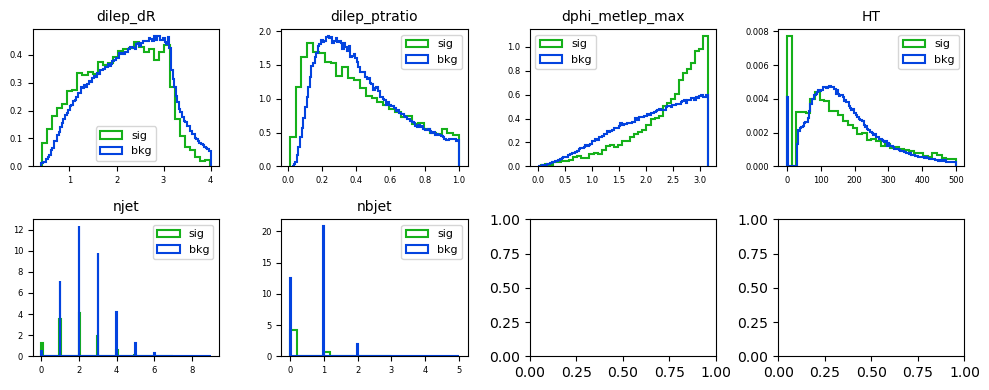

In [10]:
import matplotlib.pyplot as plt
import math

train_var = ['dilep_dR', 'dilep_ptratio', 'dphi_metlep_max', 'HT', 'njet', 'nbjet']
num_vars = len(train_var)
ncols = 4
nrows = math.ceil(num_vars / ncols)
vertical_size = nrows * 2

fig, ax = plt.subplots(nrows, ncols, figsize=(10, vertical_size))
ax = ax.flatten()

decorate_hist = {
    'bins':'auto',
    'histtype':'step',
    'linewidth':1.5,
    'density':True,
    'log':False
}

for i, var in enumerate(train_var):
    ax[i].hist(df[df['truth'] == 1][var], label='sig', color='xkcd:green', **decorate_hist)
    ax[i].hist(df[df['truth'] == 0][var], label='bkg', color='xkcd:blue',  **decorate_hist)
    ax[i].set_title(var, fontsize=10)
    ax[i].legend(loc='best', fontsize=8)
    ax[i].tick_params(axis='both', labelsize=6)

plt.tight_layout()
#plt.savefig('combined_plot.png')
plt.show()

# The Neural Network

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-04-16 14:26:10.262463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Prepating the dataframe for training and testing:

In [12]:
df_train, df_test = train_test_split(df, test_size=0.7, stratify=df['truth'])
#del df
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test  = df_test.sample(frac=1).reset_index(drop=True)

nsig_train = len(df_train.query('truth == 1'))
nsig_test  = len(df_test.query('truth == 1'))
nbkg_train = len(df_train.query('truth == 0'))
nbkg_test  = len(df_test.query('truth == 0'))

print(f'Statistics:')
print(f'nSig split into train and test: {nsig_train}, {nsig_test}')
print(f'nBkg split into train and test: {nbkg_train}, {nbkg_test}')

#Numpy arrays that go into the training and testing:
X_train= df_train[train_var].values
y_train= df_train['truth'].values
X_test = df_test[train_var].values
y_test = df_test['truth'].values

Statistics:
nSig split into train and test: 3618, 8441
nBkg split into train and test: 108211, 252494


#### Min-max scaler:

In [13]:
def ScaleMinMax(x):
    maxval = x.max(axis=0)
    minval = x.min(axis=0)
    print('\n'+'-'*25)
    print('Before scaling:')
    print("Min Values:", minval)
    print("Max Values:", maxval)
    diff = maxval-minval
    # Identifying columns where
    # max and min values are different:
    nonconst = np.where(diff != 0)[0]
    
    # Normalizing only those columns:
    normed_x = x.copy()
    normed_x[:, nonconst] = 2 * ((x[:, nonconst] - minval[nonconst]) / diff[nonconst]) - 1.0
    #normed_x[:, nonconst] = -1 + 2 * ((x[:, nonconst] - minval[nonconst]) / diff[nonconst])
    
    maxval_new = normed_x.max(axis=0)
    minval_new = normed_x.min(axis=0)
    print('\nAfter scaling:')
    print("Min Values:", minval_new)
    print("Max Values:", maxval_new)
    return normed_x

In [14]:
X_train = ScaleMinMax(X_train)
X_test = ScaleMinMax(X_test)


-------------------------
Before scaling:
Min Values: [0.40048382 0.01344292 0.00463867 0.         0.         0.        ]
Max Values: [  3.99979615   0.99999106   3.14158392 499.90625      8.
   4.        ]

After scaling:
Min Values: [-1. -1. -1. -1. -1. -1.]
Max Values: [1. 1. 1. 1. 1. 1.]

-------------------------
Before scaling:
Min Values: [0.40058172 0.01265423 0.02001953 0.         0.         0.        ]
Max Values: [  3.99982595   0.99999481   3.14158392 499.96875      9.
   5.        ]

After scaling:
Min Values: [-1. -1. -1. -1. -1. -1.]
Max Values: [1. 1. 1. 1. 1. 1.]


### Model architecture

In [15]:
n_features = X_train.shape[1]
epochs_ = 10
batch_ = 100

model = Sequential()
model.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_dim=n_features, name='FirstLayer'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid', name='FinalLayer'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#opt = tf.keras.optimizers.Adam(learning_rate=0.001)
print('The NN architecture is')
model.summary()

The NN architecture is
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FirstLayer (Dense)          (None, 64)                448       
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 FinalLayer (Dense)          (None, 1)                 17        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


2024-04-16 14:26:12.516910: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
%%time

history = model.fit(X_train,y_train,epochs=epochs_,batch_size=batch_,validation_data=(X_test,y_test),verbose=1)
model.save('test_model.h5')
print('Training complete!\n')

Epoch 1/10
1119/1119 [==============================] - 16s 14ms/step - loss: 0.1384 - accuracy: 0.9673 - val_loss: 0.1236 - val_accuracy: 0.9677
Epoch 2/10
1119/1119 [==============================] - 11s 10ms/step - loss: 0.1180 - accuracy: 0.9677 - val_loss: 0.1182 - val_accuracy: 0.9677
Epoch 3/10
1119/1119 [==============================] - 10s 8ms/step - loss: 0.1160 - accuracy: 0.9679 - val_loss: 0.1166 - val_accuracy: 0.9677
Epoch 4/10
1119/1119 [==============================] - 28s 25ms/step - loss: 0.1154 - accuracy: 0.9678 - val_loss: 0.1169 - val_accuracy: 0.9675
Epoch 5/10
1119/1119 [==============================] - 19s 17ms/step - loss: 0.1148 - accuracy: 0.9679 - val_loss: 0.1163 - val_accuracy: 0.9677
Epoch 6/10
1119/1119 [==============================] - 19s 17ms/step - loss: 0.1145 - accuracy: 0.9679 - val_loss: 0.1186 - val_accuracy: 0.9676
Epoch 7/10
1119/1119 [==============================] - 18s 16ms/step - loss: 0.1143 - accuracy: 0.9679 - val_loss: 0.1158 - 

### Plotting loss and accuracy of the NN as a function of epochs

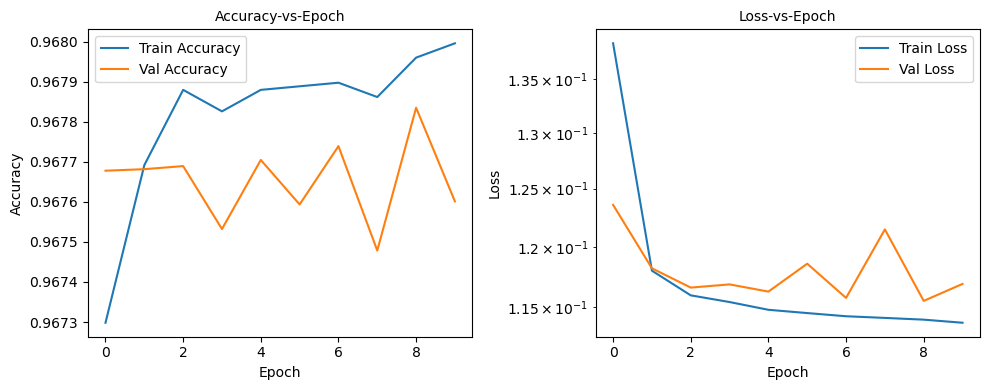

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Subplot 1: accuracy vs epoch
ax[0].plot(history.history['accuracy'],     label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Val Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy-vs-Epoch', fontsize=10)
ax[0].legend(loc='best')

# Subplot 2: loss vs epoch
ax[1].plot(history.history['loss'],     label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Val Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_yscale('log')
ax[1].legend(loc='best')
ax[1].set_title('Loss-vs-Epoch', fontsize=10)

plt.tight_layout()
#plt.savefig('combined_plot.png')
plt.show()

### Using the trained model to predict

In [18]:
%%time

y_predicted_train = model.predict(X_train)
y_predicted_test  = model.predict(X_test)

df_train['score'] = y_predicted_train
df_test['score']  = y_predicted_test

# ROC information for the test dataset
fpr, tpr, _ = roc_curve(y_test, y_predicted_test)
auc_score = auc(tpr,1-fpr)
tpr=tpr*100
fnr=(1-fpr)*100

# ROC information for training data
fpr1, tpr1, _ = roc_curve(y_train, y_predicted_train)
auc_score1 = auc(tpr1,1-fpr1)
tpr1=tpr1*100
fnr1=(1-fpr1)*100

print('Done!\n')

8155/8155 [==============================] - 39s 5ms/step
Done!

CPU times: user 3min 21s, sys: 4min 1s, total: 7min 23s
Wall time: 59.6 s


In [19]:
display(df_test)

,nlep,njet,nbjet,lep0_pt,lep0_eta,lep0_phi,lep0_iso,lep0_mt,lep1_pt,lep1_eta,...,dphi_metdilep,dphi_metlep_max,dphi_metlep_min,metpt,metphi,wt,truth,sample,subsample,score
0,2,1,1,28.002016,0.509033,-1.382324,0.012548,50.957920,16.319710,0.355652,...,1.471356,2.402527,1.071106,78.614067,-0.311218,1.357346,0,TTBar,TTTo2L2Nu,0.016705
1,2,3,1,47.062225,0.081177,2.505859,0.000000,67.236511,25.831070,-0.837158,...,0.776074,1.288574,1.260673,66.349159,1.217285,0.788938,0,TTBar,TTToSemiLeptonic,0.003884
2,2,1,1,42.243149,-0.255493,1.771240,0.017427,87.432632,38.352814,-1.294922,...,2.831650,2.600080,1.855148,47.178162,-1.911865,1.355006,0,SingleTop,t-channel_Top_InclusiveDecays,0.026849
3,2,2,1,65.689568,-0.824219,2.912598,0.000000,68.177406,20.336792,-1.405518,...,0.684075,0.760742,0.434082,94.412308,2.151855,1.220107,0,TTBar,TTToSemiLeptonic,0.008665
4,2,1,0,38.559593,-0.370239,1.910400,0.051499,83.927750,25.247168,0.864868,...,2.389182,2.751892,1.751282,72.416412,0.159119,0.931915,0,TTBar,TTToSemiLeptonic,0.128985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260930,2,3,1,30.222467,-0.979736,0.530151,0.005718,60.963192,20.574549,-0.736206,...,1.370562,2.554687,0.688354,177.693970,1.218506,1.129114,0,TTBar,TTToSemiLeptonic,0.019148
260931,2,3,1,68.104515,0.710938,1.714600,0.000000,83.921089,11.868036,-1.628418,...,1.362875,1.535156,0.027405,42.433029,0.179443,1.132445,0,TTBar,TTToSemiLeptonic,0.006229
260932,2,3,1,65.423470,-0.714722,-1.324463,0.000000,123.167542,10.350840,1.105713,...,2.609152,3.094953,2.522461,50.454960,1.197998,1.103170,0,TTBar,TTToSemiLeptonic,0.017880
260933,2,1,1,105.533440,0.477051,-1.308350,0.006040,102.274277,11.691321,-1.048828,...,1.815676,1.926636,0.214722,32.934513,0.618286,1.303301,0,SingleTop,t-channel_Top_InclusiveDecays,0.010679


In [20]:
%%capture

mybins = np.arange(0, 1.02, 0.02)

testsig = plt.hist(df_test[df_test['truth']==1]['score'], bins=mybins, density=False)
counts_sig, bins_sig, _ = testsig
errors_sig = np.sqrt(counts_sig)

testbkg = plt.hist(df_test[df_test['truth']==0]['score'], bins=mybins, density=False)
counts_bkg, bins_bkg, _ = testbkg
errors_bkg = np.sqrt(counts_bkg)

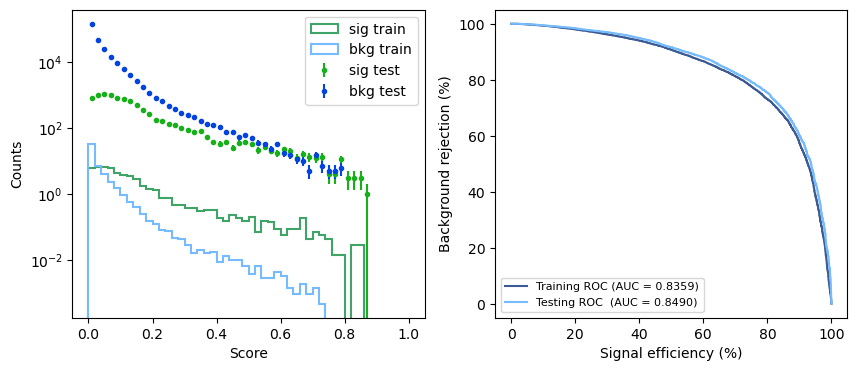

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

decorate_hist = {
    'bins':mybins,
    'histtype':'step',
    'linewidth':1.5,
    'density':True,
    'log':True
}

decorate_point ={
    'marker':'o',
    'markersize':3,
    'linestyle':''
}

ax[0].errorbar(bins_sig[:-1]+np.diff(bins_sig)/2, counts_sig, yerr=errors_sig, color='xkcd:green', label='sig test', **decorate_point)
ax[0].errorbar(bins_bkg[:-1]+np.diff(bins_bkg)/2, counts_bkg, yerr=errors_bkg, color='xkcd:blue',  label='bkg test', **decorate_point)
trainsig = ax[0].hist(df_train[df_train['truth'] == 1]['score'], color='xkcd:greenish', label='sig train', **decorate_hist)
trainbkg = ax[0].hist(df_train[df_train['truth'] == 0]['score'], color='xkcd:sky blue', label='bkg train', **decorate_hist)
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Counts')
ax[0].legend(loc='best')

ax[1].plot(tpr, fnr, color='xkcd:denim blue', label='Training ROC (AUC = %0.4f)' % auc_score)
ax[1].plot(tpr1,fnr1,color='xkcd:sky blue',   label='Testing ROC  (AUC = %0.4f)'  % auc_score1)
ax[1].set_xlabel('Signal efficiency (%)')
ax[1].set_ylabel('Background rejection (%)')
ax[1].legend(loc='best', fontsize=8)

plt.show()

## Evaluating the model on a different dataset

In [22]:
%%time
evt_samples = ['DYJetsToLL', 'HTbinnedWJets', 'QCD_MuEnriched', 'QCD_EMEnriched', 'SingleTop', 'TTBar', 'TTZ', 'TTW', 'WW', 'WZ', 'ZZ',
              'VLLD_mu', 'VLLS_mu', 'VLLD_ele', 'VLLS_ele', 'SingleMuon', 'EGamma']

alldf = pd.DataFrame()

for s in evt_samples:
    for f in files:
        if s in f:
            temp_df = read_file_into_df(f, 0)
            alldf = pd.concat([alldf, temp_df], ignore_index=True)

print('\033[1;32mDone reading files.\033[0m\n')

dataframe for DYJetsToLL M10to50 loaded.
dataframe for DYJetsToLL M50 loaded.
dataframe for HTbinnedWJets 100to200 loaded.
dataframe for HTbinnedWJets 1200to2500 loaded.
dataframe for HTbinnedWJets 200to400 loaded.
dataframe for HTbinnedWJets 2500toInf loaded.
dataframe for HTbinnedWJets 400to600 loaded.
dataframe for HTbinnedWJets 600to800 loaded.
dataframe for HTbinnedWJets 70to100 loaded.
dataframe for HTbinnedWJets 800to1200 loaded.
dataframe for QCD_MuEnriched 120to170 loaded.
dataframe for QCD_MuEnriched 170to300 loaded.
dataframe for QCD_MuEnriched 20to30 loaded.
dataframe for QCD_MuEnriched 300to470 loaded.
dataframe for QCD_MuEnriched 30to50 loaded.
dataframe for QCD_MuEnriched 470to600 loaded.
dataframe for QCD_MuEnriched 50to80 loaded.
dataframe for QCD_MuEnriched 600to800 loaded.
dataframe for QCD_MuEnriched 800to1000 loaded.
dataframe for QCD_MuEnriched 80to120 loaded.
dataframe for QCD_EMEnriched 120to170 loaded.
dataframe for QCD_EMEnriched 15to20 loaded.
dataframe for Q

In [23]:
alldf[alldf['sample']=='EGamma']

,nlep,njet,nbjet,lep0_pt,lep0_eta,lep0_phi,lep0_iso,lep0_mt,lep1_pt,lep1_eta,...,dphi_metlep1,dphi_metdilep,dphi_metlep_max,dphi_metlep_min,metpt,metphi,wt,truth,sample,subsample
868218,2.0,5.0,2.0,69.387756,-0.262634,-0.873901,0.016303,103.53904,12.702196,-1.440674,...,0.525635,0.815771,0.994995,0.525635,163.909531,-1.868896,1.0,0,EGamma,EGamma_A


In [24]:
%%time

X= alldf[train_var].values
X= ScaleMinMax(X) #Scale using original numbers from training
y= model.predict(X)
alldf['NNscore'] = y

print('\033[1;32mDone predicting.\033[0m\n')


-------------------------
Before scaling:
Min Values: [0.40006897 0.01265423 0.0032959  0.         0.         0.        ]
Max Values: [  3.99982595   0.9999997    3.14158392 499.96875     10.
   5.        ]

After scaling:
Min Values: [-1. -1. -1. -1. -1. -1.]
Max Values: [1. 1. 1. 1. 1. 1.]
27132/27132 [==============================] - 117s 4ms/step
Done predicting.

CPU times: user 7min 6s, sys: 8min 34s, total: 15min 40s
Wall time: 2min 8s


In [39]:
outdir = '../../input_trees_modified/'+jobname
os.system(f'mkdir -p {outdir}')

def write_df_into_file(df, filename, sample, subsample):
    
    filter_ = (df['sample'] == sample) & (df['subsample'] == subsample)
    df = df[filter_]
    
    df_drop = df.drop(columns=['truth', 'sample', 'subsample'])
    
    filepath = f"{outdir}/{filename}"
    
    data_dict = df_drop.to_dict('list')
    with uproot.recreate(filepath) as file:
        file['myEvents'] = data_dict
    
    print(f'Written : {filename}, nEvents={df_drop.shape[0]}')

In [41]:
%%time

for sample in alldf['sample'].unique():
    for subsample in alldf[alldf['sample'] == sample]['subsample'].unique():
        filename = f'tree_{sample}_{subsample}.root'
        write_df_into_file(alldf, filename, sample, subsample)
    #break
        
print('Done!\n')

Written : tree_DYJetsToLL_M10to50.root, nEvents=2
Written : tree_DYJetsToLL_M50.root, nEvents=300
Written : tree_HTbinnedWJets_100to200.root, nEvents=602
Written : tree_HTbinnedWJets_1200to2500.root, nEvents=15
Written : tree_HTbinnedWJets_200to400.root, nEvents=1549
Written : tree_HTbinnedWJets_2500toInf.root, nEvents=1
Written : tree_HTbinnedWJets_400to600.root, nEvents=225
Written : tree_HTbinnedWJets_600to800.root, nEvents=108
Written : tree_HTbinnedWJets_70to100.root, nEvents=199
Written : tree_HTbinnedWJets_800to1200.root, nEvents=39
Written : tree_QCD_MuEnriched_120to170.root, nEvents=66
Written : tree_QCD_MuEnriched_170to300.root, nEvents=189
Written : tree_QCD_MuEnriched_300to470.root, nEvents=124
Written : tree_QCD_MuEnriched_470to600.root, nEvents=52
Written : tree_QCD_MuEnriched_50to80.root, nEvents=5
Written : tree_QCD_MuEnriched_600to800.root, nEvents=32
Written : tree_QCD_MuEnriched_800to1000.root, nEvents=38
Written : tree_QCD_MuEnriched_80to120.root, nEvents=48
Written